# TherPal: Getting to Know Your Therapists

This program is written to perform topic modeling on providers' biographies. Generally, providers tend to list many categories of providers specialties on directories, making it very difficult to understand what the providers actually specialize in. The goal of topic modeling is to simplify the organization providers' expertise based on their similarities in expertise, to streamline decision making process for those who are searching for a provider.

In [4]:
# Required libraries.
import pandas as pd
import numpy as np
import os
import urllib
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq
import time
import random
import math

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download(['stopwords','wordnet'])

os.chdir("/Users/floraor/Desktop/Insights")
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/floraor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/floraor/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Import providers info from Psychology Today saved in csv format

In [9]:
dfp=pd.read_csv("providers.csv")
dfp.head()

,Healthgrades,Provider,Expertise,Specialty,Issues,Mental Health,Sexuality,Qualifications,Location,Insurance,Psyc_today
0,1,Alice Litter,Let's have a conversation. I can offer a fresh...,Marital and Premarital\nDepression\nAnxiety,Asperger's Syndrome\nCouples counseling\nDivor...,Mood Disorders,Gay\nLesbian,Years in Practice: 22 Years\nSchool: Simmons S...,"Worcester, Massachusetts 01605 \n(978) 716-2785",Blue Cross\nBlue Shield\nBlueCross and BlueShi...,1
1,1,Cigdem KilicBetebenner,You don’t have to suffer without hope…or help....,Addiction\nDepression\nAnxiety,ADHD\nAlcohol Use\nAnger Management\nAntisocia...,Mood Disorders\nPersonality Disorders\nThinkin...,NaN,School: Boston Graduate School of Psychoanalys...,"797 Washington Street \nSuite 4\nNewtonville, ...",AllWays Health Partners\nBMC Health Net\nBlueC...,1
2,1,Donna Harris Richards,"""What we think, that we become.” -Gandhi. As a...",Sex Therapy\nMarital and Premarital\nRelations...,ADHD\nAddiction\nAlcohol Use\nAnxiety\nBehavio...,Impulse Control Disorders\nMood Disorders,Bisexual\nGay Lesbian,Years in Practice: 17 Years\nSchool: Rhode Isl...,"New Bedford, Massachusetts 02740 \n(508) 717-3...",Blue Cross\nBlue Shield\nBlueCross and BlueShi...,1
3,1,Geoffrey Whitley,Hi! I am a medication and/or therapy provider....,Depression\nAnxiety\nEating Disorders,ADHD\nAddiction\nAutism\nBipolar Disorder\nChi...,Dissociative Disorders\nElderly Persons Disord...,Bisexual\nGay\nLesbian,Years in Practice: 4 Years\nSchool: Boston Col...,"Whitley Wellness\nC-8 Shipway Place \nBoston, ...",AllWays Health Partners\nBlue Care Network\nBl...,1
4,1,Omar Haque,**CURRENTLY ACCEPTING NEW PATIENTS; PLEASE CON...,Depression\nMood Disorders\nStress,ADHD\nAddiction\nAdoption\nAlcohol Use\nAlzhei...,Dissociative Disorders\nElderly Persons Disord...,NaN,School: Harvard Medical School\nYear Graduated...,"Brookline, Massachusetts 02446",Aetna\nAllWays Health Partners\nAnthem\nBeacon...,1


Converting objects to lists which is necessary to perform Latent Dirichlet Allocation (LDA)

In [13]:
#turn objects into lists for LDA
dfp.Expertise_list=dfp["Expertise"].tolist()
#double check if it is converted to a list
type(dfp.Expertise_list)

list

# Topic Modeling: Lateint Dirichet Allocation (LDA) 

In [14]:
#word processing
tokenizer = RegexpTokenizer(r'\w+')
en_stop = get_stop_words('en')
p_stemmer = PorterStemmer()
# list for tokenized documents in loop
texts = []

# loop through document list
for i in dfp.Expertise_list:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if i not in en_stop]
    #stopped_tokens = [i for i in tokens if not i in stopwords]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)
    
    # turn tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)

# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [15]:
import pyLDAvis
import pyLDAvis.gensim

In [104]:
# generate LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=20, random_state=50)
print(ldamodel.print_topics(num_topics=3, num_words=3))

[(0, '0.030*"dr" + 0.017*"medic" + 0.017*"patient"'), (1, '0.015*"work" + 0.014*"help" + 0.012*"therapi"'), (2, '0.015*"help" + 0.012*"feel" + 0.010*"stress"')]


In [156]:
#visualization
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
LDAvis_prepared=pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
LDAvis_prepared

/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.130467  0.006138       1        1  40.239697
1     -0.057550 -0.081231       2        1  37.842159
2     -0.072917  0.075093       3        1  21.918144, topic_info=    Category       Freq          Term      Total  loglift  logprob
334  Default  35.000000            dr  35.000000  30.0000  30.0000
25   Default  21.000000          help  21.000000  29.0000  29.0000
292  Default  16.000000    psychiatri  16.000000  28.0000  28.0000
277  Default  12.000000       harvard  12.000000  27.0000  27.0000
49   Default   6.000000        stress   6.000000  26.0000  26.0000
..       ...        ...           ...        ...      ...      ...
38    Topic3   2.249939         pleas   9.519473   0.0754  -5.4893
148   Topic3   2.145111        health   7.222957   0.3038  -5.5370
616   Topic3   2.143943         peopl   5.657552   0.5475  -5.5375
44    Topic3   2.143445  relationship  10.208460  -0.0429  -5.5378
54    Topic3   2.143240        togeth   7.160759   0.3116  -5.5379

[189 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
106       2  0.530272    achiev
106       3  0.353515    achiev
199       1  0.656035      also
199       2  0.281158      also
263       1  0.872548  american
...     ...       ...       ...
103       3  0.144770      work
193       1  0.473875      year
193       2  0.473875      year
193       3  0.094775      year
907       3  0.752605    zocdoc

[237 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [16]:
# supporting function
from gensim.models import CoherenceModel
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [17]:
grid = {}
grid['Validation_Set'] = {}

# topics range
topics_range = range(2, 11, 1)

# alpha parameter
alpha = [0.01, 0.1, 1, 'symmetric', 'asymmetric']

# beta parameter
beta = [0.01, 0.1, 1, 'symmetric']

# validation sets
num_of_docs = len(corpus)
corpus_sets = [corpus[:int(num_of_docs*0.75)], corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []}

In [ ]:
import tqdm
if 1 == 1:
    pbar = tqdm.tqdm(total=360)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

 54%|█████▍    | 196/360 [02:21<01:46,  1.53it/s]

In [ ]:
df_result = pd.read_csv('lda_tuning_results.csv')
df_result.head()

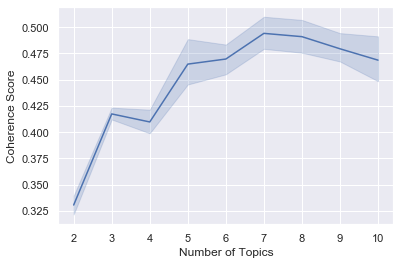

In [162]:
# visualize c_v score vs # topics in 100% corpus
df_result_100 = df_result[df_result.Validation_Set == '100% Corpus']
sns.lineplot(data=df_result_100, x='Topics', y='Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score');

# Hyperparameter Tuning

In [163]:
# look for the best alpha and beta based on c_v score
df_result_100[df_result_100.Topics == 3].sort_values('Coherence', ascending=False)[:5]

,Validation_Set,Topics,Alpha,Beta,Coherence
210,100% Corpus,3,1,1,0.447058
218,100% Corpus,3,asymmetric,1,0.443833
209,100% Corpus,3,1,0.1,0.429240
211,100% Corpus,3,1,symmetric,0.429240
208,100% Corpus,3,1,0.01,0.429240


In [164]:
# look for the best alpha and beta based on c_v score
df_result_100[df_result_100.Topics == 5].sort_values('Coherence', ascending=False)[:5]

,Validation_Set,Topics,Alpha,Beta,Coherence
250,100% Corpus,5,1,1,0.568449
242,100% Corpus,5,0.01,1,0.550996
246,100% Corpus,5,0.1,1,0.550439
254,100% Corpus,5,symmetric,1,0.537293
258,100% Corpus,5,asymmetric,1,0.514283


In [165]:
# look for the best alpha and beta based on c_v score
df_result_100[df_result_100.Topics == 7].sort_values('Coherence', ascending=False)[:5]

,Validation_Set,Topics,Alpha,Beta,Coherence
289,100% Corpus,7,1,0.1,0.562423
291,100% Corpus,7,1,symmetric,0.559723
288,100% Corpus,7,1,0.01,0.530090
290,100% Corpus,7,1,1,0.526380
282,100% Corpus,7,0.01,1,0.526138


In [166]:
# build final model (try 3)
lda_model_3 = gensim.models.LdaMulticore(corpus=corpus,
                                             id2word=dictionary,
                                             num_topics=3, 
                                             random_state=100,
                                             chunksize=100,
                                             passes=10,
                                             alpha=1,
                                             eta=1)

In [167]:
# build final model (try 5)
lda_model_5 = gensim.models.LdaMulticore(corpus=corpus,
                                             id2word=dictionary,
                                             num_topics=5, 
                                             random_state=100,
                                             chunksize=100,
                                             passes=10,
                                             alpha=1,
                                             eta=1)

# Final LDA Model: Visualization

In [220]:
# visualize the 5 topics 
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model_5, corpus, dictionary)
LDAvis_prepared

/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.062138  0.013228       1        1  37.286026
4      0.047650  0.022354       2        1  36.019341
0      0.013132 -0.017498       3        1  13.768188
2     -0.001934 -0.008820       4        1   7.504058
3      0.003290 -0.009264       5        1   5.422383, topic_info=    Category       Freq          Term      Total  loglift  logprob
334  Default  22.000000            dr  22.000000  30.0000  30.0000
25   Default  14.000000          help  14.000000  29.0000  29.0000
287  Default  14.000000       patient  14.000000  28.0000  28.0000
292  Default  10.000000    psychiatri  10.000000  27.0000  27.0000
68   Default   9.000000        client   9.000000  26.0000  26.0000
..       ...        ...           ...        ...      ...      ...
44    Topic5   0.265704  relationship   6.615460  -0.3001  -6.2288
362   Topic5   0.265442         train   6.934675  -0.3483  -6.2298
84    Topic5   0.262998          need   5.738184  -0.1681  -6.2390
161   Topic5   0.262982          mind   3.442254   0.3428  -6.2391
224   Topic5   0.262958      interest   4.157400   0.1540  -6.2392

[278 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
312       1  0.586144  2015
766       1  0.521246     3
766       4  0.521246     3
529       1  0.374262    30
529       2  0.374262    30
...     ...       ...   ...
192       1  0.472355   www
192       3  0.472355   www
193       1  0.441784  year
193       2  0.147261  year
193       3  0.294523  year

[440 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 1, 3, 4])

In [168]:
# visualize the 3 topics 
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model_3, corpus, dictionary)
LDAvis_prepared

/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.053494 -0.011187       1        1  45.498203
0      0.045270 -0.018638       2        1  39.672245
2      0.008224  0.029825       3        1  14.829556, topic_info=    Category       Freq     Term      Total  loglift  logprob
334  Default  24.000000       dr  24.000000  30.0000  30.0000
68   Default  11.000000   client  11.000000  29.0000  29.0000
25   Default  15.000000     help  15.000000  28.0000  28.0000
411  Default   4.000000  bipolar   4.000000  27.0000  27.0000
309  Default  11.000000  univers  11.000000  26.0000  26.0000
..       ...        ...      ...        ...      ...      ...
83    Topic3   0.884593     meet   3.531748   0.5241  -6.0321
65    Topic3   0.888718     best   4.592572   0.2661  -6.0275
281   Topic3   0.892837     make   6.767613  -0.1170  -6.0228
22    Topic3   0.890906      get   6.744202  -0.1157  -6.0250
46    Topic3   0.886453        s  11.127118  -0.6214  -6.0300

[178 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
766       1  0.513745       3
766       2  0.513745       3
766       3  0.513745       3
106       1  0.207362  achiev
106       2  0.829447  achiev
...     ...       ...     ...
103       2  0.630825    work
103       3  0.140183    work
193       1  0.369444    year
193       2  0.492592    year
193       3  0.123148    year

[333 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [221]:
pyLDAvis.save_html(LDAvis_prepared, 'therapist_lda.html')

In [170]:
# print keywords in the 3 topics
from pprint import pprint
pprint(lda_model_3.print_topics())
doc_lda = lda_model_3[corpus]

[(0,
  '0.013*"help" + 0.011*"therapi" + 0.011*"client" + 0.009*"work" + '
  '0.006*"can" + 0.006*"feel" + 0.006*"life" + 0.005*"relationship" + '
  '0.005*"experi" + 0.005*"stress"'),
 (1,
  '0.018*"dr" + 0.013*"medic" + 0.011*"patient" + 0.009*"psychiatri" + '
  '0.009*"univers" + 0.009*"treatment" + 0.008*"harvard" + 0.008*"disord" + '
  '0.006*"s" + 0.006*"hospit"'),
 (2,
  '0.008*"dr" + 0.007*"well" + 0.007*"bipolar" + 0.006*"live" + 0.006*"seid" + '
  '0.006*"work" + 0.005*"will" + 0.004*"set" + 0.004*"group" + 0.004*"togeth"')]


In [171]:
doc_lda[0]

[(0, 0.95974076), (1, 0.018315837), (2, 0.021943351)]

In [187]:
# create a df to show lda matrix
lda_dict = {0: [], 1: [], 2: []}

for _ in range(len(doc_lda)):
    for key in list(lda_dict.keys()):
        lda_dict[key].append(0)

# create a df filled with 0
lda_matrix = pd.DataFrame(lda_dict)

# fill the probability distribution of topics for each row
for i, row in enumerate(doc_lda):
    for j, (topic, prop_topic) in enumerate(row):
        lda_matrix.loc[i, topic] = prop_topic

In [188]:
lda_matrix.head()

,0,1,2
0,0.959739,0.018316,0.021945
1,0.953972,0.021348,0.024679
2,0.975668,0.011748,0.012583
3,0.958969,0.027102,0.013929
4,0.021950,0.960107,0.017943


In [204]:
lda_matrix=pd.concat([lda_matrix, dfp], 1)

In [205]:
# assign topic names using my judgement
lda_matrix.sort_values(by=0, ascending=False)[:5]

,0,1,2,Healthgrades,Provider,Expertise,Specialty,Issues,Mental Health,Sexuality,Qualifications,Location,Insurance,Psyc_today
13,0.977686,0.011746,0.010568,0,David Brendel,"As a psychiatrist, executive coach, and philos...",Anxiety\nADHD\nCareer Counseling,Addiction\nAlcohol Use\nAnger Management\nBeha...,Dissociative Disorders\nImpulse Control Disord...,Types of Therapy\n\nCareer counseling\nCoachin...,"Leading Minds Executive Coaching, LLC\n26 Trap...",Years in Practice: 10+ Years\nSchool: Universi...,Out of Network,1
2,0.975668,0.011748,0.012583,1,Donna Harris Richards,"""What we think, that we become.” -Gandhi. As a...",Sex Therapy\nMarital and Premarital\nRelations...,ADHD\nAddiction\nAlcohol Use\nAnxiety\nBehavio...,Impulse Control Disorders\nMood Disorders,Bisexual\nGay Lesbian,Years in Practice: 17 Years\nSchool: Rhode Isl...,"New Bedford, Massachusetts 02740 \n(508) 717-3...",Blue Cross\nBlue Shield\nBlueCross and BlueShi...,1
12,0.965970,0.015477,0.018553,0,Dale young,I am a psychologist practicing for over 20 yea...,NaN,Adoption\nAnxiety\nBipolar Disorder\nCoping Sk...,Mood Disorders\nPersonality Disorders\nPsychosis,Bisexual\nGay\nLesbian Types of Therapy\n\nEcl...,"896 Beacon Street \nSuite 308\nBoston, Massach...",Years in Practice: 20+ Years\nSchool: Massachu...,BlueCross and BlueShield\nOut of Network,1
15,0.964015,0.017586,0.018399,0,Stephen Wiener,"When people decide to come to therapy, they ar...",Relationship Issues\nDepression\nSelf Esteem,Anxiety\nAssertiveness\nBehavioral Issues\nCod...,Elderly Persons Disorders\nMood Disorders\nPer...,Types of Therapy\n\nCognitive\nPsychodynamic\n...,10420 Old Olive Street Rd \nSte 209\nSaint Lou...,Years in Practice: 30+ Years\nSchool: Universi...,Aetna\nAnthem\nBlueCross and BlueShield\nCigna...,1
14,0.963007,0.020910,0.016083,0,Henry Friedman,I am a psychiatrist trained in psychotherapy a...,NaN,NaN,NaN,NaN,"6 Garden Terrace \nCambridge, Massachusetts 02...",Years in Practice: 30+ Years\nLicense and Stat...,NaN,1


In [206]:
lda_matrix.sort_values(by=1, ascending=False)[:5]

,0,1,2,Healthgrades,Provider,Expertise,Specialty,Issues,Mental Health,Sexuality,Qualifications,Location,Insurance,Psyc_today
24,0.000000,0.983141,0.000000,0,Theodore Wasik,*Please note that Dr. Wasik is currently not a...,Psychiatrist\nPsychotherapist,NaN,NaN,NaN,Medical School - Virginia Commonwealth Univers...,"61 Roseland St., Suite #8\nCambridge, MA 02140",Aetna\nCaterpillar\nGEHA\nHarvard Pilgrim Heal...,0
22,0.012428,0.975827,0.011745,0,Robert Tittmann,Dr. Robert Tittmann is a psychiatrist treating...,Psychiatrist\nPsychotherapist,NaN,NaN,NaN,"Medical School - Brown University, Doctor of M...","14A Eliot Street, 3rd Floor\nCambridge, MA 02138",all insurance policies with out of network ben...,0
20,0.014551,0.971116,0.014333,0,John Ellis,"J. Matson Ellis, MD received his MD from Louis...",Psychiatrist,NaN,NaN,NaN,"Medical School - Louisiana State University, N...",NaN,\nAnthem Blue Cross\nAnthem Blue Cross Blue Sh...,0
16,0.014183,0.970751,0.015066,0,Hans Agrawal,"Dr. Agrawal was educated at Harvard College, t...",Psychiatrist\nPsychotherapist,NaN,NaN,NaN,"1218 Massachusetts Avenue\nCambridge, MA 02138","Medical School - Yale University, Doctor of Me...",Aetna\nAnthem Blue Cross\nAnthem Blue Cross Bl...,0
10,0.015961,0.967867,0.016171,0,Charles Hanson,Dr. Hanson has decades of experience in psychi...,ADHD\nAddiction\nAlcohol Use\nAlzheimer's\nAnx...,Elderly Persons Disorders\nMood Disorders\nPsy...,NaN,NaN,"9 Spring Street \nWaltham, Massachusetts 02452...",Years in Practice: 41 Years\nSchool: Harvard M...,Aetna\nBlue Cross\nBlue Shield\nBlueCross and ...,1


In [207]:
lda_matrix.sort_values(by=2, ascending=False)[:5]

,0,1,2,Healthgrades,Provider,Expertise,Specialty,Issues,Mental Health,Sexuality,Qualifications,Location,Insurance,Psyc_today
7,0.015357,0.000000,0.975259,1,Jonathan Perry,"I've been doing this for a long time, and I've...",Bipolar Disorder\nDepression\nRelationship Issues,Emotional Disturbance\nGrief\nSchool Issues\nS...,Mood Disorders,Bisexual\nGay\nLesbian,"2013 N Green Acres Rd, Suite C \nFayetteville,...",Years in Practice: 30+ Years\nSchool: State Un...,BlueCross and BlueShield\nOut of Network,1
19,0.014785,0.015871,0.969344,0,Janet H Seide,"**Once setting up an appointment, Dr. Seide wi...",Psychologist,NaN,NaN,NaN,Boston College (PhD)\nBoston College (Master’s),"35 Bedford St, Suite 7\nLexington, MA 02420",Anthem Blue Cross\nAnthem Blue Cross Blue Shie...,0
23,0.054239,0.108773,0.836988,0,Stephen Sternbach,We respectfully request 24 Hours notice for ca...,Psychiatrist,NaN,NaN,NaN,"Medical School - Duke University, Doctor of Me...","10 Langley Road, Suite 303\nNewton Center, MA ...",Aetna\nAnthem Blue Cross Blue Shield\nBlue Cro...,0
11,0.058004,0.296893,0.645103,0,Chike Nwankwo,"Chiké Nwankwo, ""Doctor Chiké,"" is a Harvard tr...",Child or Adolescent\nDual Diagnosis\nADHD,Addiction\nAdoption\nAlcohol Use\nAsperger's S...,Mood Disorders\nPersonality Disorders\nPsychos...,Modality\n\nIndividuals\nCouples\nFamily\nVide...,"1842 Beacon Street \nSTE 403A\nBrookline, Mass...",Years in Practice: 14 Years\nSchool: Universit...,Out of Network,1
9,0.789168,0.170984,0.039849,1,Peter Williams,Dr. Peter Williams is a Licensed Psychologist ...,ADHD\nDepression\nAnxiety,Addiction\nAdoption\nAlcohol Use\nAnger Manage...,Elderly Persons Disorders\nImpulse Control Dis...,Bisexual\nGay\nLesbian,45 Pleasant Street \nPost Office Box 1197\nNew...,Years in Practice: 20+ Years\nSchool: Universi...,Aetna\nAmerican Behavioral\nAnthem\nBeacon\nBl...,1


In [208]:
lda_matrix.set_index('Provider', inplace=True)

In [209]:
lda_matrix.head(8)

,0,1,2,Healthgrades,Expertise,Specialty,Issues,Mental Health,Sexuality,Qualifications,Location,Insurance,Psyc_today
Provider,,,,,,,,,,,,,
Alice Litter,0.959739,0.018316,0.021945,1,Let's have a conversation. I can offer a fresh...,Marital and Premarital\nDepression\nAnxiety,Asperger's Syndrome\nCouples counseling\nDivor...,Mood Disorders,Gay\nLesbian,Years in Practice: 22 Years\nSchool: Simmons S...,"Worcester, Massachusetts 01605 \n(978) 716-2785",Blue Cross\nBlue Shield\nBlueCross and BlueShi...,1
Cigdem KilicBetebenner,0.953972,0.021348,0.024679,1,You don’t have to suffer without hope…or help....,Addiction\nDepression\nAnxiety,ADHD\nAlcohol Use\nAnger Management\nAntisocia...,Mood Disorders\nPersonality Disorders\nThinkin...,NaN,School: Boston Graduate School of Psychoanalys...,"797 Washington Street \nSuite 4\nNewtonville, ...",AllWays Health Partners\nBMC Health Net\nBlueC...,1
Donna Harris Richards,0.975668,0.011748,0.012583,1,"""What we think, that we become.” -Gandhi. As a...",Sex Therapy\nMarital and Premarital\nRelations...,ADHD\nAddiction\nAlcohol Use\nAnxiety\nBehavio...,Impulse Control Disorders\nMood Disorders,Bisexual\nGay Lesbian,Years in Practice: 17 Years\nSchool: Rhode Isl...,"New Bedford, Massachusetts 02740 \n(508) 717-3...",Blue Cross\nBlue Shield\nBlueCross and BlueShi...,1
Geoffrey Whitley,0.958969,0.027102,0.013929,1,Hi! I am a medication and/or therapy provider....,Depression\nAnxiety\nEating Disorders,ADHD\nAddiction\nAutism\nBipolar Disorder\nChi...,Dissociative Disorders\nElderly Persons Disord...,Bisexual\nGay\nLesbian,"Whitley Wellness\nC-8 Shipway Place \nBoston, ...",Years in Practice: 4 Years\nSchool: Boston Col...,AllWays Health Partners\nBlue Care Network\nBl...,1
Omar Haque,0.021950,0.960107,0.017943,1,**CURRENTLY ACCEPTING NEW PATIENTS; PLEASE CON...,Depression\nMood Disorders\nStress,ADHD\nAddiction\nAdoption\nAlcohol Use\nAlzhei...,Dissociative Disorders\nElderly Persons Disord...,NaN,"Brookline, Massachusetts 02446",School: Harvard Medical School\nYear Graduated...,Aetna\nAllWays Health Partners\nAnthem\nBeacon...,1
Ruxandra Carp,0.816857,0.166219,0.016924,1,BcBs/ AllWays Partners Healthcare. Completed H...,Child or Adolescent\nMood Disorders\nMedicatio...,ADHD\nAnger Management\nAnxiety\nAsperger's Sy...,NaN,Types of Therapy\nCognitive Behavioral (CBT)\n...,"Ruxandra Carp M.D., Child & Adult Psychiatry\n...",Years in Practice: 10+ Years\nSchool: Harvard ...,AllWays Health Partners\nAnthem\nBlueCross and...,1
Eric Zhou,0.036271,0.946184,0.017545,1,Are you struggling from sleepless nights and f...,Sleep or Insomnia\nDepression\nAnxiety,Chronic Illness\nCoping Skills\nStress,NaN,Types of Therapy\n\nCognitive Behavioral (CBT)...,"Newton, Massachusetts 02459 \n(617) 651-0851",Years in Practice: 8 Years\nSchool: University...,Out of Network,1
Jonathan Perry,0.015357,0.000000,0.975259,1,"I've been doing this for a long time, and I've...",Bipolar Disorder\nDepression\nRelationship Issues,Emotional Disturbance\nGrief\nSchool Issues\nS...,Mood Disorders,Bisexual\nGay\nLesbian,"2013 N Green Acres Rd, Suite C \nFayetteville,...",Years in Practice: 30+ Years\nSchool: State Un...,BlueCross and BlueShield\nOut of Network,1


In [210]:
# save lda_matrix
lda_matrix.to_csv('therapist_lda.csv')
lda_matrix.shape

(25, 13)

In [266]:
dfv = pd.read_csv("therapist_lda.csv", index_col ="Provider") 
dfv.head()
dfv = dfv.rename(columns = {"0": "Topic1", 
                                  "1":"Topic2", 
                                  "2": "Topic3"}) 

In [267]:
dfv.head()

,Topic1,Topic2,Topic3,Healthgrades,Expertise,Specialty,Issues,Mental Health,Sexuality,Qualifications,Location,Insurance,Psyc_today
Provider,,,,,,,,,,,,,
Alice Litter,0.959739,0.018316,0.021945,1,Let's have a conversation. I can offer a fresh...,Marital and Premarital\nDepression\nAnxiety,Asperger's Syndrome\nCouples counseling\nDivor...,Mood Disorders,Gay\nLesbian,Years in Practice: 22 Years\nSchool: Simmons S...,"Worcester, Massachusetts 01605 \n(978) 716-2785",Blue Cross\nBlue Shield\nBlueCross and BlueShi...,1
Cigdem KilicBetebenner,0.953972,0.021348,0.024679,1,You don’t have to suffer without hope…or help....,Addiction\nDepression\nAnxiety,ADHD\nAlcohol Use\nAnger Management\nAntisocia...,Mood Disorders\nPersonality Disorders\nThinkin...,NaN,School: Boston Graduate School of Psychoanalys...,"797 Washington Street \nSuite 4\nNewtonville, ...",AllWays Health Partners\nBMC Health Net\nBlueC...,1
Donna Harris Richards,0.975668,0.011748,0.012583,1,"""What we think, that we become.” -Gandhi. As a...",Sex Therapy\nMarital and Premarital\nRelations...,ADHD\nAddiction\nAlcohol Use\nAnxiety\nBehavio...,Impulse Control Disorders\nMood Disorders,Bisexual\nGay Lesbian,Years in Practice: 17 Years\nSchool: Rhode Isl...,"New Bedford, Massachusetts 02740 \n(508) 717-3...",Blue Cross\nBlue Shield\nBlueCross and BlueShi...,1
Geoffrey Whitley,0.958969,0.027102,0.013929,1,Hi! I am a medication and/or therapy provider....,Depression\nAnxiety\nEating Disorders,ADHD\nAddiction\nAutism\nBipolar Disorder\nChi...,Dissociative Disorders\nElderly Persons Disord...,Bisexual\nGay\nLesbian,"Whitley Wellness\nC-8 Shipway Place \nBoston, ...",Years in Practice: 4 Years\nSchool: Boston Col...,AllWays Health Partners\nBlue Care Network\nBl...,1
Omar Haque,0.021950,0.960107,0.017943,1,**CURRENTLY ACCEPTING NEW PATIENTS; PLEASE CON...,Depression\nMood Disorders\nStress,ADHD\nAddiction\nAdoption\nAlcohol Use\nAlzhei...,Dissociative Disorders\nElderly Persons Disord...,NaN,"Brookline, Massachusetts 02446",School: Harvard Medical School\nYear Graduated...,Aetna\nAllWays Health Partners\nAnthem\nBeacon...,1


References:
http://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/ https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/